In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from os import walk
import os
import pickle as p
import matplotlib.pyplot as plt

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0 1A2K_C:AB: 17.732818603515625, SC_SCORE: 0.0, RATIO: inf
1 1ACB_E:I: 22.87175750732422, SC_SCORE: 0.0, RATIO: inf
2 1AHW_AB:C: 25.29705810546875, SC_SCORE: 0.0, RATIO: inf
3 1AK4_A:D: 12.181198120117188, SC_SCORE: 0.0, RATIO: inf
4 1AKJ_AB:DE: 36.882232666015625, SC_SCORE: 0.0, RATIO: inf
5 1ATN_A:D: 18.379379272460938, SC_SCORE: 0.0, RATIO: inf
6 1AVX_A:B: 26.9713134765625, SC_SCORE: 0.0, RATIO: inf
7 1AVZ_B:C: 16.53209686279297, SC_SCORE: 0.0, RATIO: inf
8 1AY7_A:B: 15.359237670898438, SC_SCORE: 0.0, RATIO: inf
9 1B6C_A:B: 25.90313720703125, SC_SCORE: 0.0, RATIO: inf
10 1BJ1_HL:VW: 21.545989990234375, SC_SCORE: 0.0, RATIO: inf
11 1B

<ipython-input-2-aee28f92c6cd>:41: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'{i} {system}: {delta_sasa[i]}, SC_SCORE: {scores[i]}, RATIO: {delta_sasa[i]/scores[i]}')
<ipython-input-2-aee28f92c6cd>:41: RuntimeWarning: invalid value encountered in double_scalars
  print(f'{i} {system}: {delta_sasa[i]}, SC_SCORE: {scores[i]}, RATIO: {delta_sasa[i]/scores[i]}')


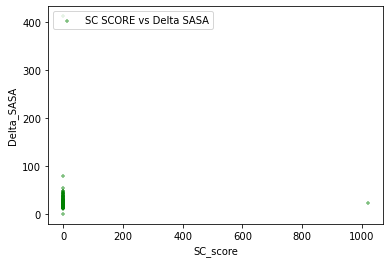

In [2]:
# Begin main routine.

##Get list of complex names
f = []
for root, dirs, files in walk("/media/jim/Research_TWO/FFT_PPI/2.redock/5.fft_sampling", topdown=False):
    for name in dirs:
        f.append(name)
f.sort()

complex_sasa = p.load(open("/home/jim/src/p39/jupyter/fftanalysis/data/complex_sasa_sums.p", "rb"))
receptor_sasa = p.load(open("/home/jim/src/p39/jupyter/fftanalysis/data/rec_sasa_sums.p", "rb"))
ligand_sasa = p.load(open("/home/jim/src/p39/jupyter/fftanalysis/data/lig_sasa_sums.p", "rb"))

keys = list(complex_sasa.keys())
keys.sort()


scores = np.zeros(len(keys))
for i, system in enumerate(keys):
    if os.path.exists(f'/media/jim/Research_TWO/FFT_PPI/2.redock/5.fft_sampling/{system}/sc_function_new.npy'):
        sc_function = np.load(f'/media/jim/Research_TWO/FFT_PPI/2.redock/5.fft_sampling/{system}/sc_function_new.npy')
        scores[i] = sc_function[0][0][0]
        # print(f'{system}: {sc_function[0][0][0]}')
    else:
        scores[i] = 0
        print(0)

complex_sasa = p.load(open("/home/jim/src/p39/jupyter/fftanalysis/data/complex_sasa_sums.p", "rb"))
receptor_sasa = p.load(open("/home/jim/src/p39/jupyter/fftanalysis/data/rec_sasa_sums.p", "rb"))
ligand_sasa = p.load(open("/home/jim/src/p39/jupyter/fftanalysis/data/lig_sasa_sums.p", "rb"))

delta_sasa = np.zeros(len(complex_sasa))

for i, system in enumerate(keys):
    if system in keys:
        d_sasa = (receptor_sasa[system] + ligand_sasa[system]) - complex_sasa[system]
        # d_sasa = complex_sasa[system] - (receptor_sasa[system] + ligand_sasa[system])
        # if d_sasa > 0:
        delta_sasa[i] = d_sasa
        # print(f'{i} {system}: {delta_sasa[i]}, SC_SCORE: {scores[i]}')
        print(f'{i} {system}: {delta_sasa[i]}, SC_SCORE: {scores[i]}, RATIO: {delta_sasa[i]/scores[i]}')


np.save("delta_sasa_complex_minus_rl", delta_sasa)
np.save("scores", scores)

plt.scatter(scores, delta_sasa, 10, c="g", alpha=0.5, marker='+',
            label="SC SCORE vs Delta SASA")
plt.xlabel("SC_score")
plt.ylabel("Delta_SASA")
plt.legend(loc='upper left')
plt.show()

In [27]:
x = scores
y = delta_sasa

indicies = np.where(y == 0)
print(indicies)

indicies = indicies[::-1]

for i in indicies:
    x = np.delete(x, i)
    y = np.delete(y, i)

outliers = [97, 147]

for j in outliers:
    x = np.delete(x, j)
    y = np.delete(y, j)

x = x.reshape((-1,1))

(array([145]),)


In [28]:
model = LinearRegression().fit(x, y)

In [29]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.9291008494139142
intercept: 1.1186583367165035
slope: [0.02127036]


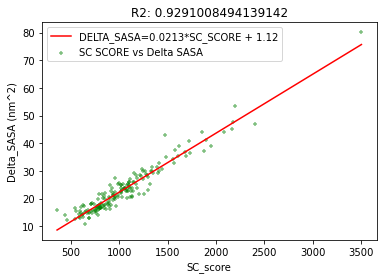

In [32]:
# scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y, 10, c="g", alpha=0.5, marker='+',
            label="SC SCORE vs Delta SASA")
# regression plot
rx = np.linspace(x.min(), x.max(), 165)
ry = model.coef_*rx + model.intercept_

ax.plot(rx, ry, '-r', label=f'DELTA_SASA={float(model.coef_):.4f}*SC_SCORE + {float(model.intercept_):.2f}')
plt.xlabel("SC_score")
plt.ylabel("Delta_SASA (nm^2)")
ax.set_title(f'R2: {r_sq}')
ax.legend(loc='upper left')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
pred_y = []
for value in x:
    pred_y.append(model.coef_*value + model.intercept_)

In [35]:
mean_squared_error(y, pred_y)

5.806539354009463

In [21]:
mean_squared_error(y, pred_y, multioutput='raw_values')

array([5.00129345])

In [27]:
x_sort = sorted(list(x))

In [29]:
pred_y = []
for value in x_sort:
    pred_y.append(model.coef_*value + model.intercept_)

In [31]:
y_sort = sorted(list(y))

In [34]:
mean_squared_error(y_sort, pred_y)

0.5070975462051122

In [5]:
zero_list = [  0,   5,  22,  34,  40,  48,  53,  65,  76,  97, 102, 106, 112, 151]

for zero in zero_list:
    print(keys[zero])

1A2K_C:AB
1ATN_A:D
1E96_A:B
1FQJ_A:B
1GRN_A:B
1I4D_D:AB
1J2J_A:B
1KXP_A:D
1NVU_Q:S
1WQ1_R:G
1Z0K_A:B
2A9K_A:B
2BTF_A:P
3CPH_G:A


In [2]:
import nglview as nv
import mdtraj as md

lig_traj = md.load('/media/jim/Research_TWO/FFT_PPI/2.redock/2.minimize/1WQ1_R:G/ligand.inpcrd', top='/media/jim/Research_TWO/FFT_PPI/2.redock/1.amber/1WQ1_R:G/ligand.prmtop')
rec_traj = md.load('/media/jim/Research_TWO/FFT_PPI/2.redock/2.minimize/1WQ1_R:G/receptor.inpcrd', top='/media/jim/Research_TWO/FFT_PPI/2.redock/1.amber/1WQ1_R:G/receptor.prmtop')
com_traj = rec_traj.stack(lig_traj)
# lig_traj = remove_non_atoms(lig_traj)
# rec_traj = remove_non_atoms(rec_traj)
# lig_sasa = md.shrake_rupley(lig_traj)
# rec_sasa = md.shrake_rupley(rec_traj)
com = nv.show_mdtraj(com_traj)
com

NGLWidget()

In [ ]:
lig = nv.show_mdtraj(lig_traj)
lig.add_licorice(selection='resid 1')
lig

In [30]:
def remove_non_atoms(traj):
    from mdtraj.geometry.sasa import _ATOMIC_RADII
    import numpy as np
    remove = []
    for atom in traj.topology.atoms:
        if atom.element.symbol not in _ATOMIC_RADII:
            print(f'{atom.element.symbol} not in radii list')
            remove.append(atom.index)
    for index in remove[::-1]:
        print(f'Deleting {traj.topology.atom(index).element.symbol} at {index}')
        traj.topology.delete_atom_by_index(index)
        # np.delete(traj.xyz, index)
    return traj

In [33]:
import pandas as pd
lig_traj.xyz.shape
atoms, bonds = lig_traj.topology.to_dataframe()
# test = atoms[atoms['resName'] == 'HIS']
test = atoms[atoms['element'] == 'VS']
new_top = md.Topology.from_dataframe(atoms, bonds)
new_traj = md.Trajectory(lig_traj.xyz, new_top)
test.index
# bonds.shape

Int64Index([2619, 2621, 2622], dtype='int64')

In [37]:
# bonds[-5:-1]
import numpy as np
print(bonds.shape)
for deleteme in test.index[::-1]:
    # print(deleteme)
    delete_list = np.where(bonds == deleteme)
    bonds = np.delete(bonds, delete_list, axis=0)
xyz = np.delete(lig_traj.xyz, test.index, axis=1)
print(xyz.shape)
print(bonds.shape)
np.where(bonds == 2619)

(2674, 4)
(1, 2657, 3)
(2674, 4)


(array([], dtype=int64), array([], dtype=int64))

In [55]:
new_atoms = atoms.drop(test.index)
new_atoms.reset_index()
new_top = md.Topology.from_dataframe(new_atoms, bonds)
new_traj = md.Trajectory(xyz, new_top)

ValueError: atoms must be uniquely numbered starting from zero.

In [57]:
new_atoms.reset_index()
new_atoms[new_atoms['resName'] == 'GDP']

,serial,name,element,resSeq,resName,chainID,segmentID
2620,None,PB,P,166,GDP,0,
2623,None,O3A,O,166,GDP,0,
2624,None,PA,P,166,GDP,0,
2625,None,O1A,O,166,GDP,0,
2626,None,O2A,O,166,GDP,0,
2627,None,O5',O,166,GDP,0,
2628,None,C5',C,166,GDP,0,
2629,None,H50,H,166,GDP,0,
2630,None,H51,H,166,GDP,0,
2631,None,C4',C,166,GDP,0,


In [ ]:
lig = nv.show_mdtraj(new_traj)
lig